# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [27]:
temp = pd.read_csv('Temp_states.csv')

#### Print `temp`

In [28]:
temp.head(5)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [29]:
temp.dtypes
# There are two columns with categorical data, City and State,
# and another column with numeric data as float, Temperature.

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [30]:
temp[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [31]:
temp[temp['State'] == 'New York']['Temperature'].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [32]:
temp[temp['Temperature'] > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [33]:
temp[temp['Temperature'] > 15]['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [34]:
temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]['City']

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [35]:
# Mean
temp.groupby('State').mean()


,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [36]:
# Standard Deviation
temp.groupby('State').std()


,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [37]:
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [38]:
employee.head(5)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [39]:
employee.dtypes
# There are five columns with categorical data, Name, Department, Education, Gender and Title,
# and another two columns with numeric data as integers, Years and Salary.


Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

'\nEach employee has a different name, most of them have a master and work as analyst. There is nearly\nthe same number of men and women, most of them sarted working in the last two years and there is a \ngreat gap in the salaries. The biggest department is IT.\n'

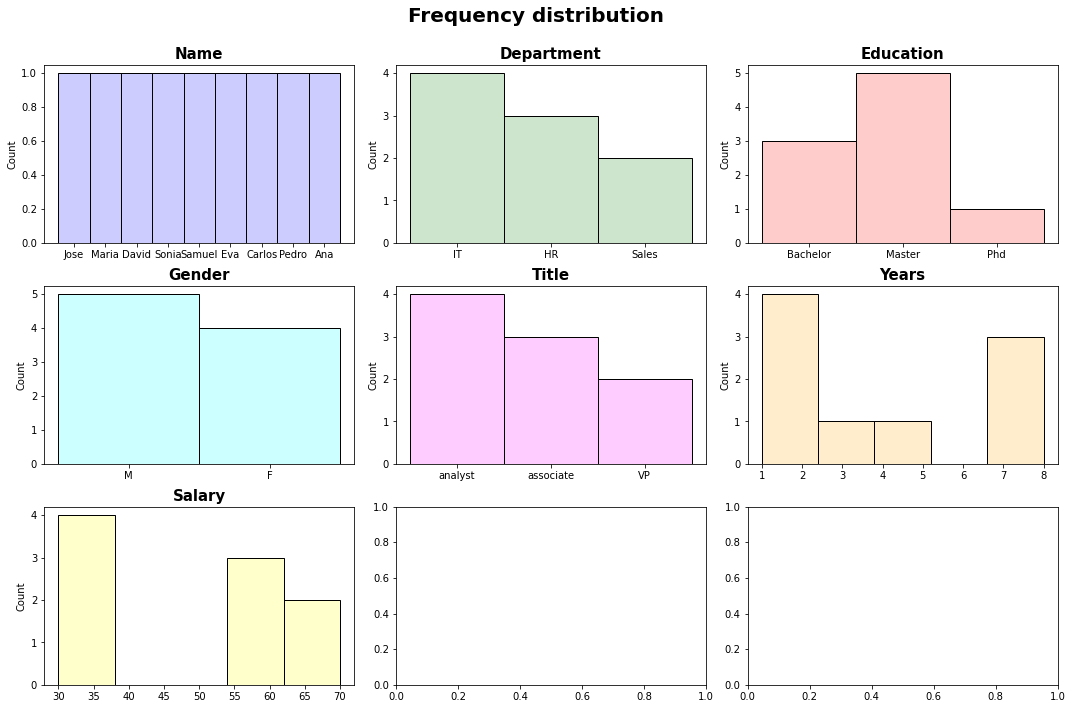

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10)) 

lista_colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'yellow'] 

axes = axes.flat

for i, colum in enumerate(employee):
    sns.histplot(
        data    = employee,
        x       = colum,
        kde     = False,
        color   = lista_colores[i],
        alpha   = 0.2,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Frequency distribution', fontsize = 20, fontweight = "bold");

"""
Each employee has a different name, most of them have a master and work as analyst. There is nearly
the same number of men and women, most of them sarted working in the last two years and there is a 
great gap in the salaries. The biggest department is IT.
"""

#### What's the average salary in this company?

In [41]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [42]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [43]:
employee['Salary'].min()


30

#### Who are the employees with the lowest salary?

In [44]:
employee[employee['Salary'] == employee['Salary'].min()]['Name']

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [45]:
employee[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [46]:
employee[employee['Name'] == 'David']['Salary']


2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [47]:
employee[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [48]:
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [49]:
employee[:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [50]:
employee[employee['Salary'] > 50]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [51]:
employee.groupby('Years').mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [52]:
employee.groupby('Title')['Salary'].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

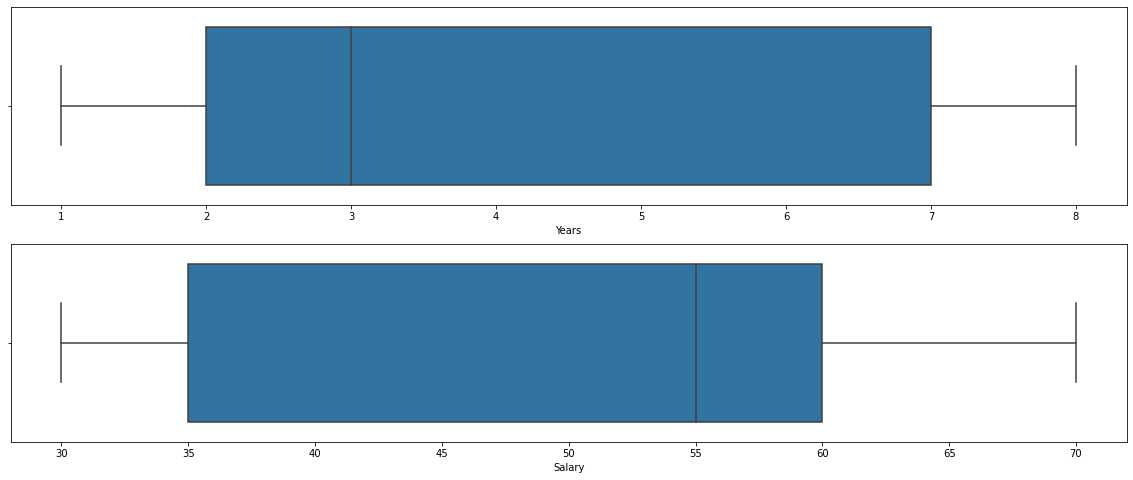

In [53]:
df_numericas = employee.select_dtypes(include=np.number)

fig, ax = plt.subplots(2, 1, figsize=(20,8))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [54]:
"""
For the column 'Years' the first quartile is 2 and the third quartile is 5, so 50% of the employees
had been working between 2 and 5 years.
We can see that the distribution is skewed to the left.
"""

"\nFor the column 'Years' the first quartile is 2 and the third quartile is 5, so 50% of the employees\nhad been working between 2 and 5 years.\nWe can see that the distribution is skewed to the left.\n"

In [55]:
"""
For the column 'Salary' the first quartile is 35 and the third quartile is 60, so 50% of the employees
earn betwen 35 and 60 euros.
We can see that the distribution is skewed to the right.
"""

"\nFor the column 'Salary' the first quartile is 35 and the third quartile is 60, so 50% of the employees\nearn betwen 35 and 60 euros.\nWe can see that the distribution is skewed to the right.\n"

#### Is the mean salary per gender different?

In [56]:
employee.groupby('Gender')['Salary'].mean()

# Yes, men earn slight more than women

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [57]:
employee.groupby('Department')[["Years", "Salary"]].agg([min, np.mean, max])

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

In [58]:
df_num = employee.select_dtypes(include=np.number)
df = employee.groupby('Department')

for i in df_num:
    print(f"In column {i} the minimum is\n{df[i].min()}\nmean is\n{df[i].mean()}\nand maximun is\n{df[i].max()}\n")

In column Years the minimum is
Department
HR       2
IT       1
Sales    2
Name: Years, dtype: int64
mean is
Department
HR       4.666667
IT       4.500000
Sales    2.500000
Name: Years, dtype: float64
and maximun is
Department
HR       8
IT       8
Sales    3
Name: Years, dtype: int64

In column Salary the minimum is
Department
HR       30
IT       30
Sales    55
Name: Salary, dtype: int64
mean is
Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64
and maximun is
Department
HR       70
IT       70
Sales    55
Name: Salary, dtype: int64



### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [59]:
employee.groupby('Department')['Salary'].agg(
    [lambda x: x.max() - x.min()]).rename(
    columns={"<lambda>": "diff_max-min"})

,diff_max-min
Department,
HR,40
IT,40
Sales,0


In [60]:
employee.groupby('Department')['Salary'].max() - employee.groupby('Department')['Salary'].min()

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [61]:
orders = pd.read_csv('orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [62]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [63]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


This dataset shows the selling orders of a company from december 2010 to december 2011.
The values for Quantity, UnitPrice and amount_spent are skewed to the left, with the median considerably lower than the mean. We can supose the presence of outliers greatly separated from the rest of the data in this columns.
The column InvoiceDate is not in the correct format and could be change to DateTime.

####  What is the average Purchase Price?

In [64]:
orders['amount_spent'].mean()

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [65]:
print(f"The highest purchase price is {orders['amount_spent'].max()} and the lowest is {orders['amount_spent'].min()}")

The highest purchase price is 168469.6 and the lowest is 0.0


#### Select all the customers we have in Spain

In [66]:
spain = orders[orders['Country'] == 'Spain']['CustomerID']
spain.head(5)

4250    12557
4251    12557
4252    12557
4253    12557
4254    12557
Name: CustomerID, dtype: int64

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [67]:
spain.value_counts().sum()

2485

#### Select all the customers who have bought more than 50 items ?

In [68]:
cust_50 = orders[orders['Quantity'] > 50]['CustomerID']
cust_50.head(5)

46     13748
83     15291
96     14688
102    14688
174    16029
Name: CustomerID, dtype: int64

#### Select orders from Spain that are above 50 items

In [69]:
ord_50 = orders[orders['Quantity'] > 50]['InvoiceNo']
ord_50.head(5)

46     536371
83     536376
96     536378
102    536378
174    536386
Name: InvoiceNo, dtype: int64

#### Select all free orders

In [70]:
ord_0 = orders[orders['amount_spent'] == 0]['InvoiceNo']
ord_0.head(5)

6914     537197
22539    539263
25379    539722
29080    540372
29082    540372
Name: InvoiceNo, dtype: int64

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [71]:
lunch_bag = orders[orders['Description'] == 'lunch bag']['InvoiceNo']
lunch_bag.head(5)

Series([], Name: InvoiceNo, dtype: int64)

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [72]:
df_2011 = orders[orders['year'] == 2011]

In [73]:
lunch_bag = df_2011.loc[df_2011['Description'].str.contains('lunch bag', case=False)]
lunch_bag['InvoiceNo'].head(5)

26340    540015
26341    540015
26512    540023
26513    540023
26860    540098
Name: InvoiceNo, dtype: int64

#### Show the frequency distribution of the amount spent in Spain.

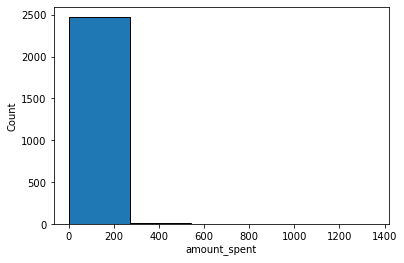

In [86]:
spain = orders[orders['Country'] == 'Spain']
sns.histplot(
    data    = spain,
    x       = spain['amount_spent'],
    kde     = False,
    alpha   = 1,
    bins    = 5,
)
plt.show()

#### Select all orders made in the month of August

In [75]:
august = orders[orders['month'] == 8]
august['InvoiceNo'].head(5)

199475    561904
199476    561904
199477    561905
199478    561905
199479    561905
Name: InvoiceNo, dtype: int64

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [76]:
august.groupby('Country')['InvoiceNo'].value_counts().sum()

27013

#### What's the  average amount of money spent by country

In [77]:
avg_country = orders.groupby('Country')['amount_spent'].mean()
avg_country.head(5)

Country
Australia    116.895620
Austria       25.624824
Bahrain       32.258824
Belgium       20.283772
Brazil        35.737500
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [78]:
orders.head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3


In [79]:
orders[orders['UnitPrice'] == orders['UnitPrice'].max()]['Description']

118352    postage
Name: Description, dtype: object

#### What was the average amount spent per year ?

In [80]:
orders.groupby('year')['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64